# What is the story is telling us
For a PXE server (an ISO installation system) in a software enterprise company, it is often hard to recognize the porformance issue in the system. <br />
This notebook is to use scikit KMean algorithm to identify the porformance issue based on the cluster patterns. <br />

###The data set is statistic of number of clients to complete the ISO installation based on the installation time (hours) they take, features <br />
1h - Number of clients which ISO installation time are within 1h <br />
2h - Number of clients which ISO installation time are from 1h to 2h <br />
3h - Number of clients which ISO installation time are from 2h to 3h <br />

###We think the system performance is good if most clients can complete the ISO installation within 2h.

In [1]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))
df.head()


Saving dataset.csv to dataset.csv


,1h,2h,3h,label
0,58,140,25,0
1,49,144,33,0
2,60,144,26,0
3,60,124,35,0
4,58,132,31,0


Check data type

In [2]:
list(set(df.dtypes.tolist()))

[dtype('int64')]

Normalize data in features 1h,2h,3h

In [16]:
from sklearn import preprocessing

x = df.drop(['label'], axis=1).to_numpy() #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)


Use elbow method to determine cluster numbers N

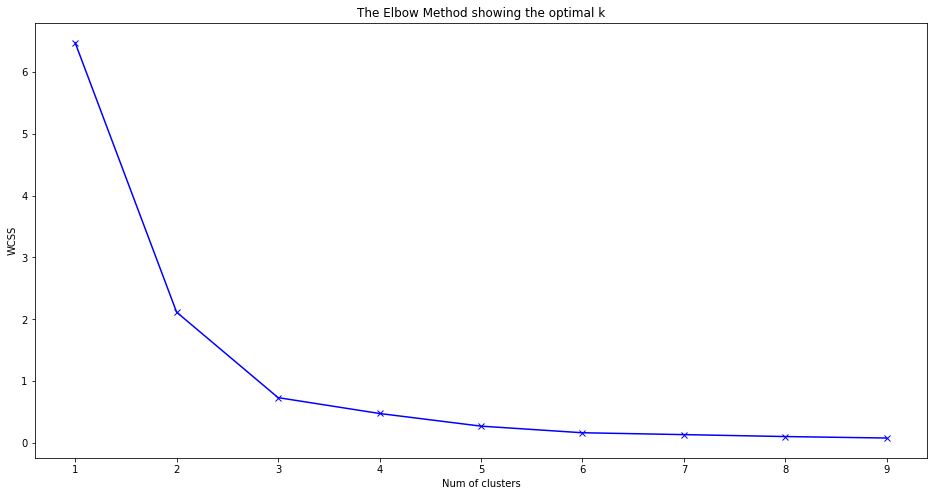

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeanModel.fit(x_scaled)
    wcss.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Num of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Use KMeans to create clusters N=3

In [37]:
X = normalized_df[0:]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmean = kmeans.predict(X)
for i, point in enumerate(x):
  print('point:', point, 'is in cluster', kmeans.labels_[i])

point: [ 58 140  25] is in cluster 1
point: [ 49 144  33] is in cluster 1
point: [ 60 144  26] is in cluster 1
point: [ 60 124  35] is in cluster 1
point: [ 58 132  31] is in cluster 1
point: [ 23 163  43] is in cluster 0
point: [ 18 175  37] is in cluster 0
point: [  7  98 124] is in cluster 2
point: [ 57 133  32] is in cluster 1
point: [ 55 125  39] is in cluster 1
point: [ 40 153  35] is in cluster 1
point: [ 43 153  31] is in cluster 1
point: [ 15 165  64] is in cluster 0
point: [ 56 130  32] is in cluster 1
point: [ 41 151  44] is in cluster 1
point: [  5 177  42] is in cluster 0
point: [ 20 151  53] is in cluster 0
point: [ 11 173  40] is in cluster 0
point: [  7 151  68] is in cluster 0
point: [  4 170  52] is in cluster 0
point: [  0   1 214] is in cluster 2
point: [  6 171  40] is in cluster 0
point: [  4 182  40] is in cluster 0
point: [ 57 143  23] is in cluster 1
point: [ 55 139  23] is in cluster 1
point: [ 58 145  19] is in cluster 1
point: [ 56 160  50] is in cluster 1
p

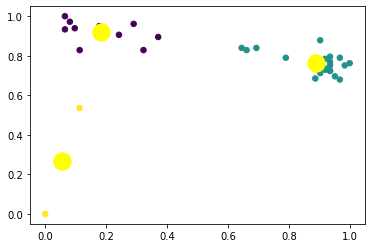

In [39]:
X = normalized_df[0:].values
plt.scatter(X[:, 0], X[:, 1], c=y_kmean, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.show()

###What the clustering results represent: <br />
cluster 0: Most clients complete their ISO Installation from 1h to 2h, then less clients complete installation from 2h to 3h, least clients complete the installation from 0h to 1h <br />
cluster 1: Most clients complete their ISO Installation from 1h to 2h, then less clients complete installation from 0h to 1h, least clients complete the installation from 2h to 3h <br />
cluster 2: Most clients complete their ISO Installation from 2h to 3h, then less clients complete installation from 1h to 2h, least clients complete the installation from 0h to 1h <br />

Therefore, <br />
if the latest data falls to cluster 0, it indicates that the performance of the system is getting worse, maintainers need to pay attention. <br />
if the latest data falls to cluster 1, it indicates that the performance of the system is doing well, that is called ideal scenario. <br />
if the latest data falls to cluster 2, it indicates that the performance of the system needs to improve immediately, that is the worst scenario. <br />